In [3]:
from keras import layers
from keras import models

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer= optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(
rotation_range = 40,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
fill_mode = 'nearest')

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [13]:
train_dir = r'C:\Users\Ahsan Raza\Desktop\cats_and_dogs_small\train'
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size = 20,
class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [14]:
test_dir= r'C:\Users\Ahsan Raza\Desktop\cats_and_dogs_small\validation'
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size = (150, 150),
batch_size = 20,
class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [27]:
for data_batch, labels_batch in test_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
from keras.preprocessing import image

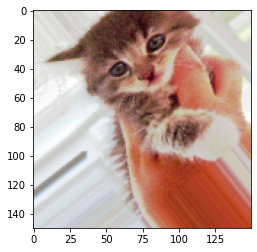

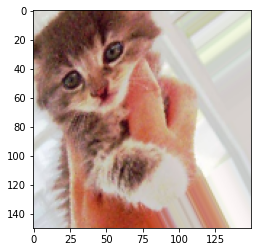

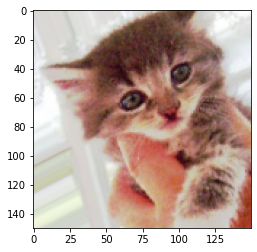

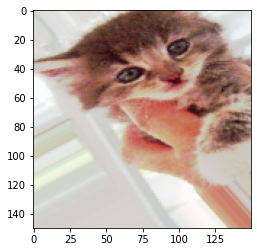

In [22]:
import os
import matplotlib.pyplot as plt
train_cats_dir = r'C:\Users\Ahsan Raza\Desktop\cats_and_dogs_small\train\cats'
fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [30]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=test_datagen,
validation_steps=50)

Epoch 1/30
32/64 [==============>...............] - ETA: 2s - loss: 0.7085 - acc: 0.5719

KeyboardInterrupt: 

In [31]:
model.save('cats_and_dogs_small_2.h5')